In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [2]:
df = pd.read_csv("face-recognition-pivot.csv")

In [3]:
df.head()

,file_x,file_y,decision,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2
0,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 0]\n .....,Yes,0.1076,0.2939,0.4640,0.1564,6.8556,0.5592,0.2951,65.6765,0.7682
1,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[112 108 63]\n [111 106 64]\n [109 106 ...,Yes,0.1314,0.3245,0.5126,0.2157,8.2025,0.6568,0.3808,73.9771,0.8727
2,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Yes,0.1031,0.4133,0.4540,0.2728,9.2224,0.7386,0.2637,69.5387,0.7263
3,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[197 199 185]\n [197 199 185]\n [198 200 1...,Yes,0.1132,0.3065,0.4759,0.1301,6.2278,0.5102,0.3276,72.6463,0.8095
4,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Yes,0.1099,0.3396,0.4689,0.2024,7.9683,0.6362,0.2524,62.0719,0.7105


In [4]:
df_raw = df.copy()


In [5]:
models = ['VGG-Face', 'Facenet', 'DeepFace']
metrics = ['cosine', 'euclidean', 'euclidean_l2']

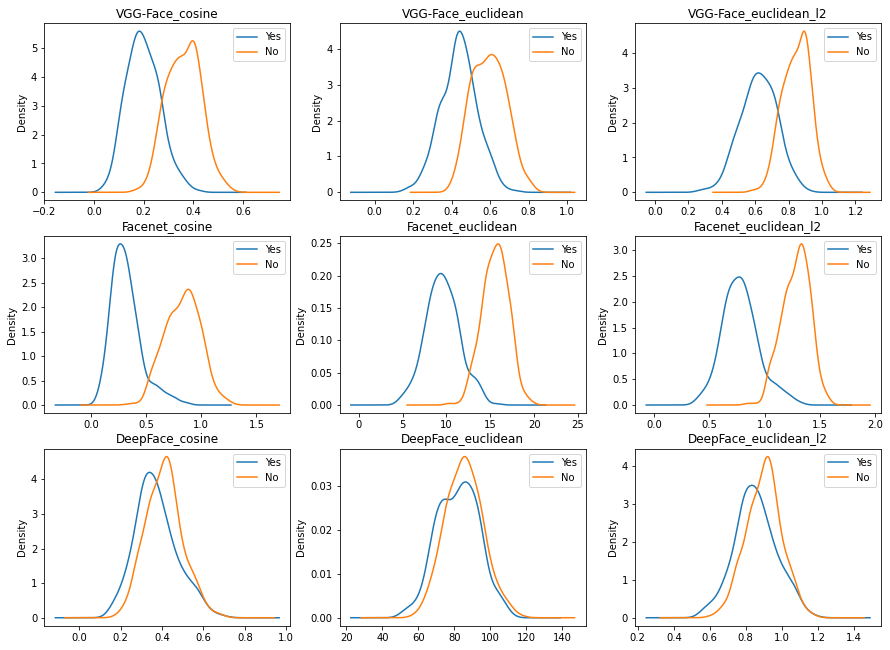

In [7]:
fig = plt.figure(figsize=(15, 15))

figure_idx = 1
for model in models:
    for metric in metrics:
        
        
        feature = '%s_%s' % (model, metric)

        ax1 = fig.add_subplot(4, 3, figure_idx)
        
        df[df.decision == "Yes"][feature].plot(kind='kde', title = feature, label = 'Yes', legend = True)
        df[df.decision == "No"][feature].plot(kind='kde', title = feature, label = 'No', legend = True)
        
        figure_idx = figure_idx + 1

plt.show()

In [8]:
columns = []
for model in models:
    for metric in metrics:
        if model == 'OpenFace' and metric == 'euclidean':
            continue
        else:
            feature = '%s_%s' % (model, metric)
            columns.append(feature)

columns.append("decision")

In [9]:
df = df[columns]


In [10]:

df.loc[df[df.decision == 'Yes'].index, 'decision'] = 1
df.loc[df[df.decision == 'No'].index, 'decision'] = 0

In [11]:
df.head()


,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2,decision
0,0.1076,0.2939,0.4640,0.1564,6.8556,0.5592,0.2951,65.6765,0.7682,1
1,0.1314,0.3245,0.5126,0.2157,8.2025,0.6568,0.3808,73.9771,0.8727,1
2,0.1031,0.4133,0.4540,0.2728,9.2224,0.7386,0.2637,69.5387,0.7263,1
3,0.1132,0.3065,0.4759,0.1301,6.2278,0.5102,0.3276,72.6463,0.8095,1
4,0.1099,0.3396,0.4689,0.2024,7.9683,0.6362,0.2524,62.0719,0.7105,1


# Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(df, test_size=0.50, random_state=34)


In [14]:
target_name = "decision"

y_train = df_train[target_name].values
x_train = df_train.drop(columns=[target_name]).values

y_test = df_test[target_name].values
x_test = df_test.drop(columns=[target_name]).values

In [16]:
df_test

,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2,decision
420,0.4891,0.6805,0.9890,1.0145,14.4111,1.4244,0.5808,92.1183,1.0777,0
415,0.3955,0.7408,0.8893,0.9528,15.6997,1.3804,0.5830,105.4868,1.0798,0
529,0.3981,0.6375,0.8923,1.0106,16.9262,1.4217,0.4061,90.4532,0.9012,0
157,0.0922,0.3201,0.4295,0.1852,7.6745,0.6085,0.2924,82.8801,0.7647,1
355,0.1870,0.4071,0.6115,0.2386,8.2996,0.6908,0.3567,75.3972,0.8446,1
...,...,...,...,...,...,...,...,...,...,...
129,0.1906,0.4202,0.6174,0.2399,8.8341,0.6927,0.3493,82.3473,0.8359,1
431,0.2159,0.4614,0.6571,0.7805,15.2986,1.2494,0.3166,71.7686,0.7957,0
559,0.4083,0.7010,0.9037,0.8712,16.3912,1.3200,0.2816,77.3462,0.7504,0
2,0.1031,0.4133,0.4540,0.2728,9.2224,0.7386,0.2637,69.5387,0.7263,1


In [17]:
df_train

,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2,decision
49,0.1402,0.4146,0.5295,0.1724,7.1828,0.5872,0.3126,85.0103,0.7907,1
98,0.2601,0.5408,0.7213,0.3425,10.2712,0.8276,0.4819,88.2212,0.9818,1
553,0.4205,0.8255,0.9170,1.0157,17.8151,1.4252,0.3595,81.0746,0.8480,0
539,0.3165,0.5050,0.7956,0.5686,13.1285,1.0664,0.3371,95.2135,0.8210,0
485,0.4273,0.5786,0.9244,1.0427,17.4541,1.4441,0.2488,74.4939,0.7054,0
...,...,...,...,...,...,...,...,...,...,...
324,0.2694,0.5037,0.7341,0.3324,10.0616,0.8153,0.3423,67.9704,0.8274,1
85,0.1263,0.3846,0.5025,0.2762,9.6872,0.7432,0.2422,64.1560,0.6960,1
490,0.3543,0.5119,0.8418,0.8168,15.2978,1.2781,0.4389,78.7791,0.9369,0
122,0.2948,0.6047,0.7679,0.3423,10.6335,0.8274,0.3632,85.8482,0.8523,1


# lightGBM

In [18]:
import lightgbm as lgb


In [19]:
features = df.drop(columns=[target_name]).columns.tolist()

lgb_train = lgb.Dataset(x_train, y_train, feature_name = features)
lgb_test = lgb.Dataset(x_test, y_test, feature_name = features)

In [20]:
params = {
    'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective': 'multiclass'
    , 'num_class': 2
    , 'metric': 'multi_logloss'
    , 'force_col_wise': 'true'
}

In [22]:
lgb_train, lgb_test

(<lightgbm.basic.Dataset at 0x1ff9c5db8e0>,
 <lightgbm.basic.Dataset at 0x1ff9c5db940>)

In [24]:
import time

In [25]:
start_time = time.time()

gbm = lgb.train(params, lgb_train, num_boost_round=400, early_stopping_rounds = 20 , valid_sets=[lgb_test])

end_time = time.time()


[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 359, number of used features: 9
[LightGBM] [Info] Start training from score -0.668387
[LightGBM] [Info] Start training from score -0.718536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 0.610095
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's multi_logloss: 0.541536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's multi_logloss: 0.484599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [26]:
print("Traning time execution: ", (end_time - start_time))

Traning time execution:  0.18199443817138672


# Evaluation

In [27]:
predictions = gbm.predict(x_test)


In [28]:
prediction_classes = []
classified = 0

index = 0
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
    
    actual = y_test[index]
    
    print("prediction is ",prediction_class," whereas actual is ",actual)
    if actual == prediction_class:
        classified = classified + 1
    
    index = index + 1

#print(classified," instances are classified in ",len(predictions)," instances") 
print("accuracy: ",round(100*classified/len(predictions),2),"%")

prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas

prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  0  whereas

In [29]:
print(classified," instances are classified in ",len(predictions)," instances") 


341  instances are classified in  359  instances


In [30]:
print(y_test), print(prediction_classes)

[0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1
 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1]
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 

(None, None)

In [31]:
prediction_classes_test = np.array(prediction_classes) 
y_test_arr = y_test


print(y_test_arr.tolist()), print(prediction_classes)

[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 

(None, None)

In [32]:
cm = confusion_matrix(y_test_arr.tolist(), prediction_classes_test)

In [33]:
cm

array([[170,   5],
       [ 13, 171]], dtype=int64)

In [34]:
tn, fp, fn, tp = cm.ravel()


In [35]:
tn, fp, fn, tp


(170, 5, 13, 171)

In [36]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [37]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  97.1590909090909 %
Recall:  92.93478260869566 %
F1 score  95.0 %
Accuracy:  94.98607242339833 %


In [40]:
idx = 0
prediction = gbm.predict(x_test)
prediction

array([[0.98802082, 0.01197918],
       [0.98711978, 0.01288022],
       [0.98712373, 0.01287627],
       [0.01349579, 0.98650421],
       [0.0134983 , 0.9865017 ],
       [0.98733092, 0.01266908],
       [0.01350322, 0.98649678],
       [0.0135021 , 0.9864979 ],
       [0.97831847, 0.02168153],
       [0.01350304, 0.98649696],
       [0.01350395, 0.98649605],
       [0.01350347, 0.98649653],
       [0.59162696, 0.40837304],
       [0.01348946, 0.98651054],
       [0.95277436, 0.04722564],
       [0.98706385, 0.01293615],
       [0.98712234, 0.01287766],
       [0.98709886, 0.01290114],
       [0.98712323, 0.01287677],
       [0.9879546 , 0.0120454 ],
       [0.01889815, 0.98110185],
       [0.63329662, 0.36670338],
       [0.98716103, 0.01283897],
       [0.98747551, 0.01252449],
       [0.98489191, 0.01510809],
       [0.98712148, 0.01287852],
       [0.86471123, 0.13528877],
       [0.74948097, 0.25051903],
       [0.09006111, 0.90993889],
       [0.67995794, 0.32004206],
       [0.

In [41]:
prediction_classes = []
classified = 0

index = 0
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
    
    actual = y_test[index]
    
    #print("prediction is ",prediction_class," whereas actual is ",actual)
    if actual == prediction_class:
        classified = classified + 1
    
    index = index + 1

#print(classified," instances are classified in ",len(predictions)," instances") 
print("accuracy: ",round(100*classified/len(predictions),2),"%")

accuracy:  94.99 %


# Real time

In [51]:
idendities = {
  "Ariel_Sharon": [],
  "Colin_Powell": [],
  "Donald_Rumsfeld": [],
  "George_W_Bush": [],
  "Gerhard_Schroeder": [],
  "Hugo_Chavez": [],
  "Jean_Chretien": [],
  "John_Ashcroft": [],
  "Junichiro_Koizumi": [],
  "Tony_Blair": []
    
}

In [52]:
import os
from PIL import Image

for key, values in idendities.items():
    # Get the path to all the images
        for image in os.listdir("Dataset/DeepFace/{}".format(key)):
            path_string = os.path.join("Dataset/DeepFace/{}".format(key), image)
            image = Image.open(path_string)
            imgNp = np.array(image, "uint8")
            values.append(imgNp)


In [53]:
#single prediction
idx = 0
verified = np.argmax(gbm.predict(np.expand_dims(df.iloc[idx].values[0:-1], axis=0).shape)[0]) == 1
print("verified: ", verified)

verified:  True


In [56]:
gbm.predict(np.expand_dims(df.iloc[idx].values[0:-1], axis=0))

array([[0.01350266, 0.98649734]])

In [57]:
df.iloc[idx].values[0:-1]

array([0.1076, 0.2939, 0.464, 0.1564, 6.8556, 0.5592, 0.2951, 65.6765,
       0.7682], dtype=object)

In [58]:
from deepface.basemodels import VGGFace, Facenet, FbDeepFace

In [59]:
pretrained_models = {}

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")

pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")

pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")

VGG-Face loaded
Facenet loaded
FbDeepFace loaded


In [60]:
models = ['VGG-Face', 'Facenet', 'DeepFace']
metrics = ['cosine', 'euclidean', 'euclidean_l2']

In [72]:
for model in models: 
    result  = DeepFace.verify("Test_img/demo1.jpg", "Test_img/Donald_Rumsfeld_0118.jpg", model_name = model
                                           , model = pretrained_models[model]
                                           , distance_metric = metric
                                           , detector_backend = 'mtcnn'
                                           , enforce_detection = False)


                


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  83  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


find function lasts  7.788910388946533  seconds


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

Representations stored in  Dataset/DeepFace / representations_facenet.pkl  file. Please delete this file when you add new identities in your database.


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


find function lasts  145.9460210800171  seconds


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

Representations stored in  Dataset/DeepFace / representations_deepface.pkl  file. Please delete this file when you add new identities in your database.


Analyzing: 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]

find function lasts  270.6980633735657  seconds


In [75]:
df_test = DeepFace.find(img_path = "Test_img/demo1.jpg", db_path = "Dataset/DeepFace", model_name = "Ensemble")


Loading VGG-Face:   0%|          | 0/4 [00:00<?, ?it/s]       

Ensemble learning enabled


Finding representations:  22%|██▏       | 18/83 [03:07<11:16, 10.41s/it] 


KeyboardInterrupt: 

In [81]:
deepface_ensemble = lgb.Booster(model_file= 'face-recognition-ensemble-model.txt')


In [85]:
deepface_ensemble

In [93]:
df_test = DeepFace.find("Test_img/demo1.jpg", db_path= "Dataset/DeepFace", model_name = 'Ensemble')


Loading VGG-Face:   0%|          | 0/4 [00:00<?, ?it/s]       

Ensemble learning enabled


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

Representations stored in  Dataset/DeepFace / representations_ensemble.pkl  file. Please delete this file when you add new identities in your database.


Analyzing: 100%|██████████| 1/1 [00:13<00:00, 13.53s/it]

find function lasts  728.4462289810181  seconds


In [95]:
df_test

,identity,verified,score
0,Dataset/DeepFace\Ariel_Sharon/Ariel_Sharon_001...,True,0.996917
1,Dataset/DeepFace\Ariel_Sharon/Ariel_Sharon_002...,True,0.996076
2,Dataset/DeepFace\Ariel_Sharon/Ariel_Sharon_000...,True,0.996019
3,Dataset/DeepFace\Ariel_Sharon/Ariel_Sharon_001...,True,0.996019
4,Dataset/DeepFace\Ariel_Sharon/Ariel_Sharon_000...,True,0.995910
5,Dataset/DeepFace\Ariel_Sharon/Ariel_Sharon_002...,True,0.995339
6,Dataset/DeepFace\Ariel_Sharon/Ariel_Sharon_004...,True,0.993614
7,Dataset/DeepFace\Jean_Chretien/Jean_Chretien_0...,True,0.832759
8,Dataset/DeepFace\John_Ashcroft/John_Ashcroft_0...,True,0.805445


In [91]:
verified = np.argmax(gbm.predict(df_test['distance']))

KeyError: 'distance'